<a href="https://colab.research.google.com/github/canokaue/eel7417/blob/master/T1_EEL7417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T1 Simulação
#### Kaue Cano Souza - 18204680

## UFSC - Professor Dr. Leonardo da Silva Resende

### EEL7417 - Fundamentos de Comunicação Digital

Importação de bibliotecas utilizadas


In [5]:
from pprint import pprint
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Q1

1.1) Gerar amostras aleatórias jogando N vezes um único dado (considerando igual probabilidade para cada valor do dado). <br>
a) Primeiramente, jogue o dado 10 vezes. (help randi) <br>
b) Plote o histograma dos resultados obtidos.(help hist, help bar)

In [6]:
#a)
result_list = np.random.choice(np.arange(1, 7),size = 10, p=np.repeat(1/6, 6))
pprint(result_list)
# 1 to 7 so "0" isn't an option
# each face has an equal 1/6 prob of landing

array([3, 1, 4, 6, 5, 1, 3, 1, 4, 6])


(array([3., 0., 0., 0., 2., 0., 2., 0., 1., 2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

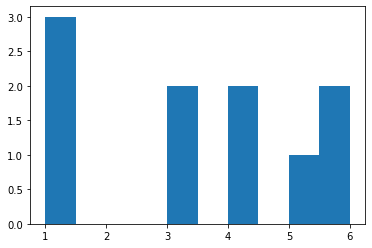

In [7]:
#b)
plt.hist(result_list)

1.2) Pode-se normalizar os valores do histograma com N para que possa ser obtida a função densidade de probabilidade (pdf)estimada (ou seja, a soma dos bins do histograma deve ser igual a um). <br>
a) Plote o histograma normalizado (pdf estimada). <br>
b) Defina a verdadeira pdf para o dado justo e plote junto com a pdf estimada (na mesma figura). <br>
c) A verdadeira pdf e a estimada pdf são iguais?

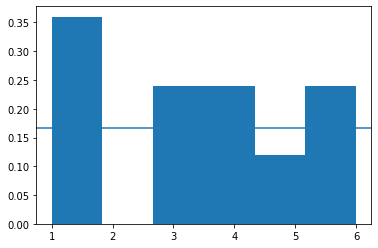

In [20]:
#a) & b)
plt.hist(result_list, bins=6, density = True)
plt.axhline(y=1/6) #expected mean

c) A PDF obtida a partir da normalização do histograma de resultados é bastante diferente da ideal. Por um outro lado, oom um número maior de ensaios esta discrepância tende a diminuir.

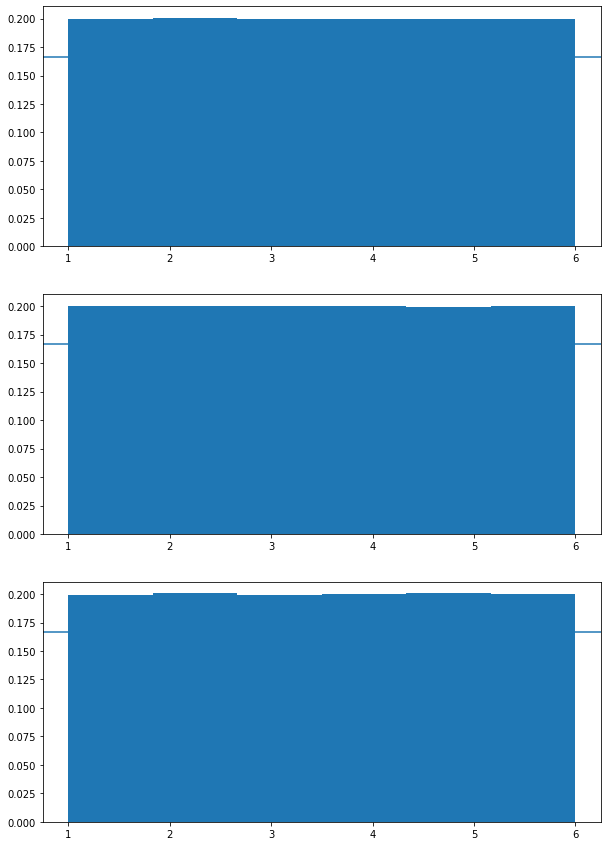

In [27]:
f, axs = plt.subplots(2,2,figsize=(10,15))
for i in range(3):
 new_list = np.random.choice(np.arange(1, 7),size = 1000000, p=np.repeat(1/6, 6))
 plt.subplot(3, 1, (i+1))
 plt.hist(new_list,bins = 6,density = True)
 plt.axhline(y=1/6)
plt.show()

# Q2

2.1) Gerar amostras aleatórias jogando o dado, onde a probabilidade para o valor 6 é 1/4 e para os demais valores são equiprováveis. <br>
a) primeiro, jogue o dado por 10 vezes.

In [28]:
#a)
unfair_list = np.random.choice(np.arange(1, 7),size = 10, p=[0.15 ,0.15 ,0.15 ,0.15 ,0.15,0.25])
pprint(unfair_list)

array([4, 5, 4, 6, 4, 3, 4, 2, 2, 5])


2.2) Plote o histograma normalizado.

(array([0.3 , 0.15, 0.  , 0.6 , 0.3 , 0.15]),
 array([2.        , 2.66666667, 3.33333333, 4.        , 4.66666667,
        5.33333333, 6.        ]),
 <a list of 6 Patch objects>)

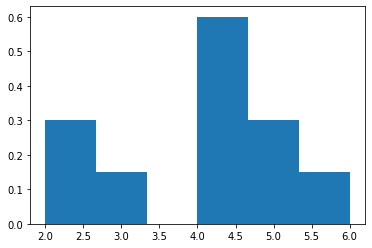

In [37]:
plt.hist(unfair_list, bins=6, density = True)

2.3) Definir a pdf verdadeira para o dado desbalanceado e plote junto com a pdf estimada.

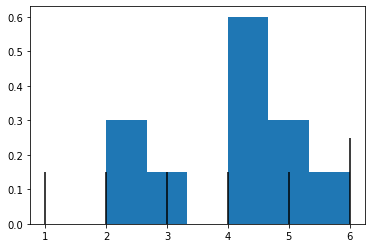

In [35]:
plt.hist(unfair_list, bins=6, density = True)
for face in np.arange(1, 7):
  if face == 6:
    plt.vlines(x=face,ymin = 0,ymax =0.25)
  else:
    plt.vlines(x=face,ymin = 0,ymax =0.15)


# Q3

3.1) Gerar 10.000 amostras para a variável X.(help randn).

In [38]:
X = np.random.randn(10000)
pprint(X)

array([ 0.64455207,  2.31766451,  1.59076335, ..., -1.47304114,
       -0.52072342, -0.13643435])


3.2) Calcular as seguintes estatísticas das amostras observadas:
- média (ou valor esperado) (help mean). 
- desvio padrão (help std).
- variância (help var). 

In [41]:
meanX = np.mean(X) #média de x
stdX = np.std(X) #desvio padrão de x
varX = np.var(X) #variância de x
pprint('Média de X: {}'.format(meanX))
pprint('Desvio P de X: {}'.format(stdX))
pprint('Variância de X: {}'.format(varX))

'Média de X: 0.0063566832484638364'
'Desvio P de X: 1.0039453490188246'
'Variância de X: 1.0079062638165297'


3.3) Plotar o histograma normalizado. <br>
a) Note, agora, que a pdf não é discreta e a assim deve-se usar valores suficientemente baixos para o passo do eixo-x, de maneira de fornecer um bom gráfico. (dica: use um passo de 0.1 para o eixo-x). 

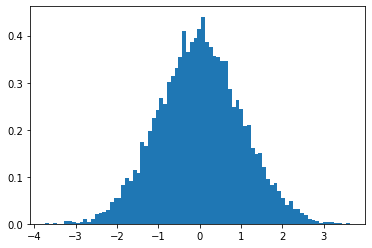

In [58]:
plt.hist(X, bins=80,density = True) # 0.1 step -> [-4,4] -> 80 bins
ticks = plt.xticks()[0]

# Q4

4.1) Repetir o exercício anterior, porém, em vez de usar X˜(0,1), use X~(μ,σˆ2),em que μ=2 e σˆ2=4.

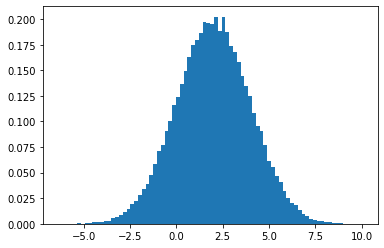

In [59]:
X2 = 2*np.random.randn(100000) + 2
meanX2 = np.mean(X2)
stdX2 = np.std(X2)
varX2 = np.var(X2)
plt.hist(X2, bins=80,density = True)
ticks2 = plt.xticks()[0]
plt.show()

In [60]:
pprint('Média de X2: {}'.format(meanX2))
pprint('Desvio P de X2: {}'.format(stdX2))
pprint('Variância de X2: {}'.format(varX2))

'Média de X2: 1.998776496186127'
'Desvio P de X2: 1.993325976927716'
'Variância de X2: 3.973348450294834'


4.2) Note que o eixo-x do histograma deve ser definido, de tal forma, que todas (ou grande maioria) as amostras estejam dentro dos limites do eixo-x. (dica: a função hist ajuda a estimar esses limites ou pode-se explorar as funções min(x) e max(x)

In [63]:
pprint(max(X2))
pprint(min(X2))
print('\nPortanto, todas as amostras de X2 estão compreendidas no histograma acima.')

10.035798740404095
-6.38193999926278

Portanto, todas as amostras de X2 estão compreendidas no histograma acima.


# Q5

5.1) Definir a probabilidade P(a<X<b), em que a=2 e b=6. (helpqfunc). 

In [66]:
prob1=stats.norm.sf((2-meanX2)/stdX2)-norm.sf((6-meanX2)/stdX2)
pprint('P(2<X2<6): {}'.format(prob1))

'P(2<X2<6): 0.4773968056571514'


5.2) Calcular a probabilidade P(X<a) e P(X>b).

In [80]:
proba=1 - stats.norm.sf((2-meanX2)//stdX2)
probb= stats.norm.sf((6-meanX2)//stdX2)
pprint('P(X2<2): {}'.format(proba))
pprint('P(6<X2): {}'.format(probb))

'P(X2<2): 0.5'
'P(6<X2): 0.022750131948179195'


5.3) Checar numericamente que a soma das probabilidades deve ser igual a 1, ou seja, que P(-∞<X<∞) = P(X<a) + P(a<X<b) + P(X>b) = 1. 

In [85]:
prob_total = prob1 + proba + probb
pprint(prob_total)
offset_pct = abs(1 - prob_total) * 100
pprint('Offset: {}%'.format(offset_pct))
pprint('Portanto, a soma pode ser considerada igual a 1 e os cálculos passados são válidos.')

1.0001469376053305
'Offset: 0.014693760533046607%'
('Portanto, a soma pode ser considerada igual a 1 e os cálculos passados são '
 'válidos.')


# Q6

A Distribuição Normal é uma escolha intuitiva para modelagem de sinais ruidosos em sistemas de comunicação. Em muitos modelos de sistemas, é frequentemente difícil, ou mesmo impossível, definir todas as fontes de ruídos isoladamente. No entanto, baseado no Teorema de Limite Central, uma distribuição da soma de variáveis aleatórias aproxima-se de uma distribuição normal, com o
incremento do número de variáveis somadas envolvidas. Ou seja, a distribuição de X1, X2+...+XK aproxima-se de uma distribuição normal com o aumento de K. 

6.1) Pode-se observar este fato com o exemplo do dado justo, visto anteriormente. Em vez de jogar o dado uma vez, faz-se K vezes e observa-se a soma das jogadas. Por exemplo, com 2 (dois) dados, X1 e X2, a variável aleatória seria Z = X1 + X2, em que os valores estariam entre 2 e 12. 

In [87]:
def z_dice(throws):
  x1 = np.random.choice(np.arange(1, 7),size = throws)
  x2 = np.random.choice(np.arange(1, 7),size = throws)
  return x1+x2

6.2) Gerar amostras de valores aleatórios para Z (soma dos dados) jogando-os 20 vezes.

In [88]:
z_list = z_dice(20)
pprint(z_list)

array([ 6,  5,  4,  8,  7, 10,  7,  8,  2,  9,  8,  6,  6,  7,  3, 11,  3,
       11, 12,  9])


6.3) Repita o experimento por 10.000 vezes e plote o histograma de Z.

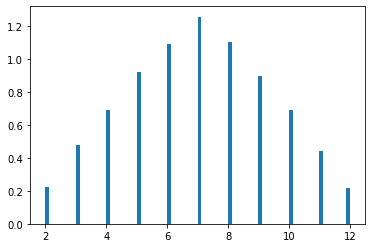

In [98]:
mega_z_list = z_dice(10000)
plt.hist(mega_z_list, bins=80,density = True)
ticks = plt.xticks()[0] 

6.4) Embora a pdf pela jogada do dado justo seja uma distribuição uniforme discreta, aqui a variável Z parece mais com uma distribuição Gaussiana (baseado no Teorema do Limite Central). Faz sentido? Qual é o valor esperado de Z? 

In [101]:
pprint('A afirmação anterior corresponde com o que foi estudado em sala e demonstrado durante este trabalho de simulação. Com um número suficientemente elevado de lançamentos para os dados, seus valores se aproximam de uma distribuição normal bem como a soma que resulta em Z.')
valor_esperado = np.mean(mega_z_list)
pprint('Portanto, o valor esperado de Z é: {}'.format(valor_esperado))

('A afirmação anterior corresponde com o que foi estudado em sala e '
 'demonstrado durante este trabalho de simulação. Com um número '
 'suficientemente elevado de lançamentos para os dados, seus valores se '
 'aproximam de uma distribuição normal bem como a soma que resulta em Z.')
'Portanto, o valor esperado de Z é: 6.9711'
